## Data Set Description
https://ncugo.com/pyedm_2021/FinalProject/Data%20Set%20Description.html

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/home/jovyan/TaipeiSansTCBeta-Regular.ttf')

plt.rcParams['font.family'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False

## 資料預處理

In [ ]:
# 資料預處理
import pandas as pd
import numpy as np

# 顯示所有 columns
pd.set_option('display.max_columns', None)

# 讀 csv 
dataset = pd.read_csv('student-mat.csv',sep=";")

# 丟掉一些特徵
df = dataset.drop(columns=["address","famsize","Mjob","Fjob","reason","guardian","traveltime","G1","G2"])

# 把以下特徵轉成 二元 
df['school'] = df['school'].replace(['GP','MS'], [0,1]).astype('category')
df['sex'] = df['sex'].replace(['F','M'], [0,1]).astype('category')
df['Pstatus'] = df['Pstatus'].replace(['A','T'], [0,1]).astype('category')
df['schoolsup'] = df['schoolsup'].replace(['yes','no'], [1,0]).astype('category')
df['famsup'] = df['famsup'].replace(['yes','no'], [1,0]).astype('category')
df['paid'] = df['paid'].replace(['yes','no'], [1,0]).astype('category')
df['activities'] = df['activities'].replace(['yes','no'], [1,0]).astype('category')
df['nursery'] = df['nursery'].replace(['yes','no'], [1,0]).astype('category')
df['higher'] = df['higher'].replace(['yes','no'], [1,0]).astype('category')
df['internet'] = df['internet'].replace(['yes','no'], [1,0]).astype('category')
df['romantic'] = df['romantic'].replace(['yes','no'], [1,0]).astype('category')

df.head(10)

# df2 = df1.copy()
# df1_X = df1.iloc[:, :-1].values
# df1_y = df1.iloc[:, -1].values
# print(df1.dtypes)

,school,sex,age,Pstatus,Medu,Fedu,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,0,4,4,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,4,2,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,3,3,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10
5,0,1,16,1,4,3,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15
6,0,1,16,1,2,2,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,11
7,0,0,17,0,4,4,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6
8,0,1,15,0,3,2,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,19
9,0,1,15,1,3,4,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,15


### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 切 "特徵" 與 "target"
df1 = df.copy()
df1_X = df1.iloc[:, :-1].values
df1_y = df1.iloc[:, -1].values

# 切訓練集、測試集
X_train, X_test, y_train, y_test = train_test_split(df1_X, df1_y, test_size=0.3, random_state=1922)

#(1) build/name a model
lr = LinearRegression()

#(2) train the model using(X,y)
lr.fit(X_train, y_train)

# (3) use the model to predict
y_pred = lr.predict(X_test)
y_pred = np.around(y_pred, 2)

# 
print("R-Squared : ", lr.score(df1_X, df1_y), '\n')
print("intercept_ : ", lr.intercept_)
#print("coef_ : ", lr.coef_, '\n')

# 把各特徵轉成 DataFrame 然後排序看高低
df_coef = pd.DataFrame(lr.coef_).T
df_coef.columns = df1.columns[:-1]
df_coef = df_coef.T.reset_index()
df_coef.columns = ['feature', 'value']
df_coef.sort_values('value', ascending=False)

R-Squared :  0.207201448098276 

intercept_ :  10.735535649037512


,feature,value
13,higher,2.056753
0,school,1.217944
1,sex,1.023462
6,studytime,0.648072
4,Medu,0.570220
10,paid,0.501387
20,Walc,0.402335
17,freetime,0.302774
5,Fedu,0.297452
14,internet,0.239590


In [ ]:
# 把特徵低於 0.5 以下的特徵 Drop 掉

wdrop=[]
for index, row in df_coef.iterrows():
      if abs(row['value']) <=0.5:   
                wdrop.append(row['feature'])  
np.array(wdrop)
df1 = df1.drop(columns=wdrop)
df1

,school,sex,Medu,studytime,failures,schoolsup,famsup,paid,nursery,higher,romantic,goout,Dalc,G3
0,0,0,4,2,0,1,0,0,1,1,0,4,1,6
1,0,0,1,2,0,0,1,0,0,1,0,3,1,6
2,0,0,1,2,3,1,0,1,1,1,0,2,2,10
3,0,0,4,3,0,0,1,1,1,1,1,2,1,15
4,0,0,3,2,0,0,1,1,1,1,0,2,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2,2,2,0,1,1,1,1,0,4,4,9
391,1,1,3,1,0,0,0,0,0,1,0,5,3,16
392,1,1,1,1,3,0,0,0,0,1,0,3,3,7
393,1,1,3,1,0,0,0,0,0,1,0,1,3,10


In [ ]:
# 切 特徵 與 target
df1_X = df1.iloc[:, :-1].values
df1_y = df1.iloc[:, -1].values

# 切訓練集、測試集
X_train, X_test, y_train, y_test = train_test_split(df1_X, df1_y, test_size=0.3, random_state=1019)

#(1) build/name a model
lr = LinearRegression()

#(2) train the model using(X,y)
lr.fit(X_train, y_train)

# (3) use the model to predict
y_pred = lr.predict(X_test)
y_pred = np.around(y_pred, 2)

print("R-Squared : ", lr.score(df1_X, df1_y), '\n')
print("intercept_ : ", lr.intercept_)
#print("coef_ : ", lr.coef_, '\n')

# 把各特徵轉成 DataFrame 然後排序看高低
df_coef = pd.DataFrame(lr.coef_).T
df_coef.columns = df1.columns[:-1]
df_coef = df_coef.T.reset_index()
df_coef.columns = ['feature', 'value']
df_coef.sort_values('value', ascending=False)

R-Squared :  0.19047375428938074 

intercept_ :  8.082915560969937


,feature,value
9,higher,1.615974
1,sex,1.281811
3,studytime,0.752866
0,school,0.605649
2,Medu,0.478504
7,paid,0.284200
8,nursery,0.208130
12,Dalc,-0.157526
6,famsup,-0.397942
11,goout,-0.494312


### 小結論
在 LinearRegression 中

如果將 特徵低於 0.5 移除以後預測能力會下降

.207 -> .190

## 資料預處理 將G3成績分成 2組 或 4組

In [ ]:
df3 = df.copy()
df3_2 = df.copy()
df3_4 = df.copy()

# 切 2份
# > 12 => 1
df3_2.insert(len(df3.columns), 'highlow', df3.G3.apply(lambda x: 1 if x >=12 else 0))

# 切 4份
# >15 => 4
# >10 => 3
# >5 => 2
# => 1
df3_4.insert(len(df3.columns), 'highlow', df3.G3.apply(lambda x: 4 if x >15 else 3 if x>10 else 2 if x>5 else 1))

## 分成 2組的預測

In [ ]:
# 切 特徵 與 target
df3_X = df3_2.iloc[:, :-2].values
df3_y = df3_2.iloc[:, -1].values

# 切訓練集、測試集
X_train, X_test, y_train, y_test = train_test_split(df3_X, df3_y, test_size=0.3, random_state=35417)

#(1) build/name a model
lr = LinearRegression()
#(2) train the model using(X,y)
lr.fit(X_train, y_train)
# (3) use the model to predict
y_pred = lr.predict(X_test)
y_pred = np.around(y_pred, 2)

print("R-Squared : ", lr.score(df3_X, df3_y), '\n')
print("intercept_ : ", lr.intercept_)
#print("coef_ : ", lr.coef_, '\n')

# 把各特徵轉成 DataFrame 然後排序看高低
df_coef = pd.DataFrame(lr.coef_).T
df_coef.columns = df3_2.columns[:-2]
df_coef = df_coef.T.reset_index()
df_coef.columns = ['feature', 'value']
df_coef.sort_values('value', ascending=False)

R-Squared :  0.15576416667377402 

intercept_ :  0.9235555920641563


,feature,value
1,sex,0.089846
4,Medu,0.058526
17,freetime,0.056945
14,internet,0.056906
5,Fedu,0.043825
3,Pstatus,0.021372
6,studytime,0.020131
11,activities,-0.000424
20,Walc,-0.002556
15,romantic,-0.003582


### 小結論
將 G3 分組過後，在 LinearRegression 中

R-Squared 更低 .155

## 使用分類器預測

### 1.KNN 分成 2組

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# (1) name/define model
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

#(2) train the model using(X,y)
knn.fit(X_train, y_train)

# (3) use the model to predict
y_pred = knn.predict(X_test)


print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.54


### 2.DecisionTree 分成 2組

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# (1) name/define model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.61


### 3.LogisticRegression 分成 2組

In [ ]:
from sklearn.linear_model import LogisticRegression

# (1) name/define
lr = LogisticRegression(C=1000.0, random_state=0)

# (2) train
lr.fit(X_train, y_train)

# (3) predict
y_pred = lr.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.61


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.線性SVM 分成 2組

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. 定義
svm = SVC(kernel='linear', random_state=0) # 線性 kernel='linear'
# 2. train
svm.fit(X_train, y_train)
# 3. predict
y_pred = svm.predict(X_test)

# Accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.65


### 5.非線性SVM 分成 2組

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. 定義
svm = SVC(kernel='rbf', random_state=0) # 非線性 kernel='rbf'
# 2. train
svm.fit(X_train, y_train)
# 3. predict
y_pred = svm.predict(X_test)

# Accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.61


## 高低成績的比例

## 分成 4組的預測

In [ ]:
# 切 特徵 與 target
df3_X = df3_4.iloc[:, :-2].values
df3_y = df3_4.iloc[:, -1].values

# 切訓練集、測試集
X_train, X_test, y_train, y_test = train_test_split(df3_X, df3_y, test_size=0.3, random_state=35417)

# (1) build/name a model
lr = LinearRegression()

# (2) train the model using(X,y)
lr.fit(X_train, y_train)

# (3) use the model to predict
y_pred = lr.predict(X_test)
y_pred = np.around(y_pred, 2)

print("R-Squared : ", lr.score(df3_X, df3_y), '\n')
print("intercept_ : ", lr.intercept_)
#print("coef_ : ", lr.coef_, '\n')

# 把各特徵轉成 DataFrame 然後排序看高低
df_coef = pd.DataFrame(lr.coef_).T
df_coef.columns = df3_4.columns[:-2]
df_coef = df_coef.T.reset_index()
df_coef.columns = ['feature', 'value']
df_coef.sort_values('value', ascending=False)

R-Squared :  0.18392041436159223 

intercept_ :  3.725372327516906


,feature,value
1,sex,0.203834
14,internet,0.136861
17,freetime,0.094137
5,Fedu,0.082987
6,studytime,0.034361
4,Medu,0.028068
16,famrel,0.020785
22,absences,0.007011
21,health,-0.001008
10,paid,-0.009244


### 1.KNN 分成 4組

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# (1) name/define model
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

# (2) train the model using(X,y)
knn.fit(X_train, y_train)

# (3) use the model to predict
y_pred = knn.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.39


### 2.DecisionTree 分成 4組

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# (1) name/define model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# (2) train the model using(X,y)
tree.fit(X_train, y_train)

# (3) use the model to predict
y_pred = tree.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.45


### 3.LogisticRegression 分成 4組

In [ ]:
from sklearn.linear_model import LogisticRegression

# (1) name/define
lr = LogisticRegression(C=1000.0, random_state=0)

# (2) train
lr.fit(X_train, y_train)

# (3) predict
y_pred = lr.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.46


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.線性SVM 分成 4組

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. 定義
svm = SVC(kernel='linear', random_state=0) # 線性 kernel='linear'

# 2. train
svm.fit(X_train, y_train)

# 3. predict
y_pred = svm.predict(X_test)

# Accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.49


### 5.非線性SVM 分成 4組

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. 定義
svm = SVC(kernel='rbf', random_state=0) # 非線性 kernel='rbf'

# 2. train
svm.fit(X_train, y_train)

# 3. predict
y_pred = svm.predict(X_test)

# Accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.39


## 成績分成2組的比例 高、低

<AxesSubplot:title={'center':'高低成績的比例'}, ylabel='G3'>

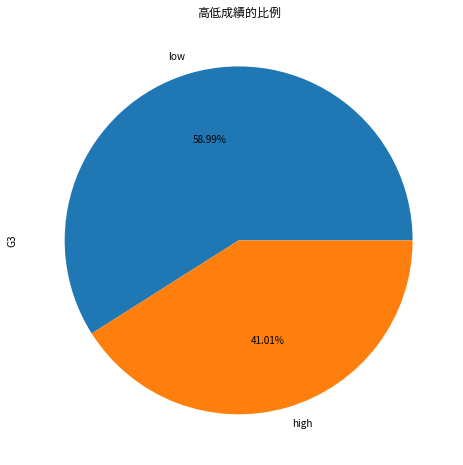

In [ ]:
#df3['highlow'].plot(kind='pie',figsize=(8,8),autopct ="%.2f%%")

df_pie = df3_2.groupby('highlow').count()
df_pie['G3'].plot(kind='pie',
                        title='高低成績的比例',
                        labels=['low','high'],
                        figsize=(8,8),
                        autopct ="%.2f%%")

## 成績分成4組的比例 高到低 A>D

<AxesSubplot:title={'center':'高低成績的比例'}, ylabel='G3'>

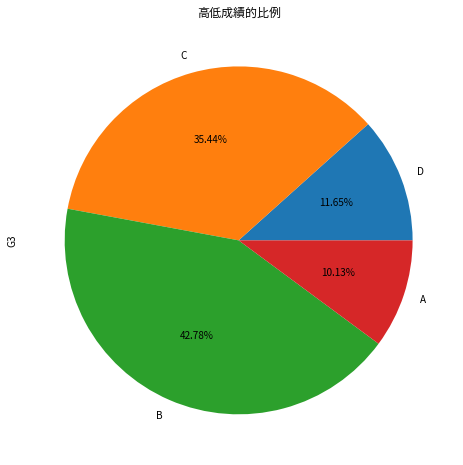

In [ ]:
df_pie_4 = df3_4.groupby('highlow').count()

df_pie_4['G3'].plot(kind='pie',
                    title='高低成績的比例',
                    labels=['D','C','B','A'],
                    figsize=(8,8),
                    autopct ="%.2f%%")

In [ ]:
# 上面各模型的分數
cut2=[0.65,0.61,0.61,0.54,0.61,0.15]
cut4=[0.49,0.39,0.45,0.4,0.46,0.18]

df_cut= pd.DataFrame({'切2組':cut2, '切4組':cut4})
df_cut.index = ['線性SVM','非線性SVM', '決策樹','KNN','邏輯斯','線性回歸']
df_cut

,切2組,切4組
線性SVM,0.65,0.49
非線性SVM,0.61,0.39
決策樹,0.61,0.45
KNN,0.54,0.40
邏輯斯,0.61,0.46
線性回歸,0.15,0.18


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '線性SVM'),
  Text(1, 0, '非線性SVM'),
  Text(2, 0, '決策樹'),
  Text(3, 0, '邏輯斯'),
  Text(4, 0, 'KNN'),
  Text(5, 0, '線性回歸')])

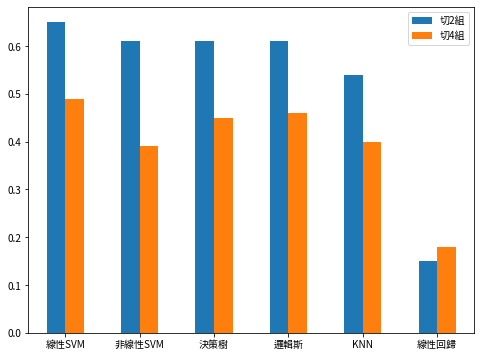

In [ ]:
# import matplotlib.font_manager
# from matplotlib.font_manager import FontProperties
# import matplotlib.pyplot as plt
# matplotlib.font_manager.fontManager.addfont('/home/jovyan/TaipeiSansTCBeta-Regular.ttf')
# plt.rcParams['font.family'] = ['Taipei Sans TC Beta']
# plt.rcParams['axes.unicode_minus'] = False

df_cut.sort_values('切2組', ascending = False).plot(kind='bar',figsize=(8,6),mark_right=True)
plt.xticks(rotation=0)